In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [330]:
import warnings
warnings.filterwarnings('ignore')

plt.rc('font',family='NanumGothic ECO')
plt.rc('axes',unicode_minus=False)

In [331]:
df_raw = pd.read_csv("/home/piai/2~5주차/2. Big Data 분석/SCALE불량.csv",encoding='euc-kr')
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


# 1. 데이터 전처리

In [332]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

## 변수별 시각화

목표변수

불량    310
양품    690
Name: scale, dtype: int64


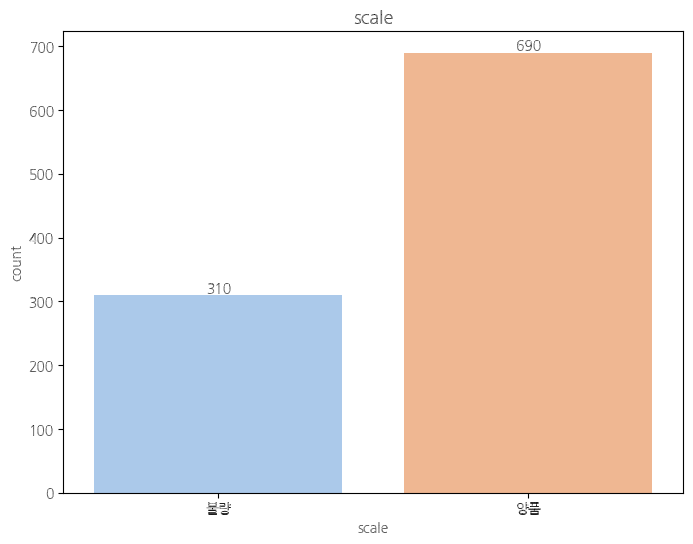

In [340]:
df=df_raw
plc_counts = df['scale'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p3 = sns.countplot(x='scale', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p3.containers[0], fmt='%d') 

ax.set_title('scale', fontsize=13)

plt.show()


설명변수

A131-DH36TM     1
A283-C          6
A516-60         3
A709-36         1
AB/A           51
               ..
NV-E32-TM       2
NV-E36-TM       5
PILAC-BT33     40
SA283-C        21
V42JBN3         4
Name: spec_long, Length: 66, dtype: int64


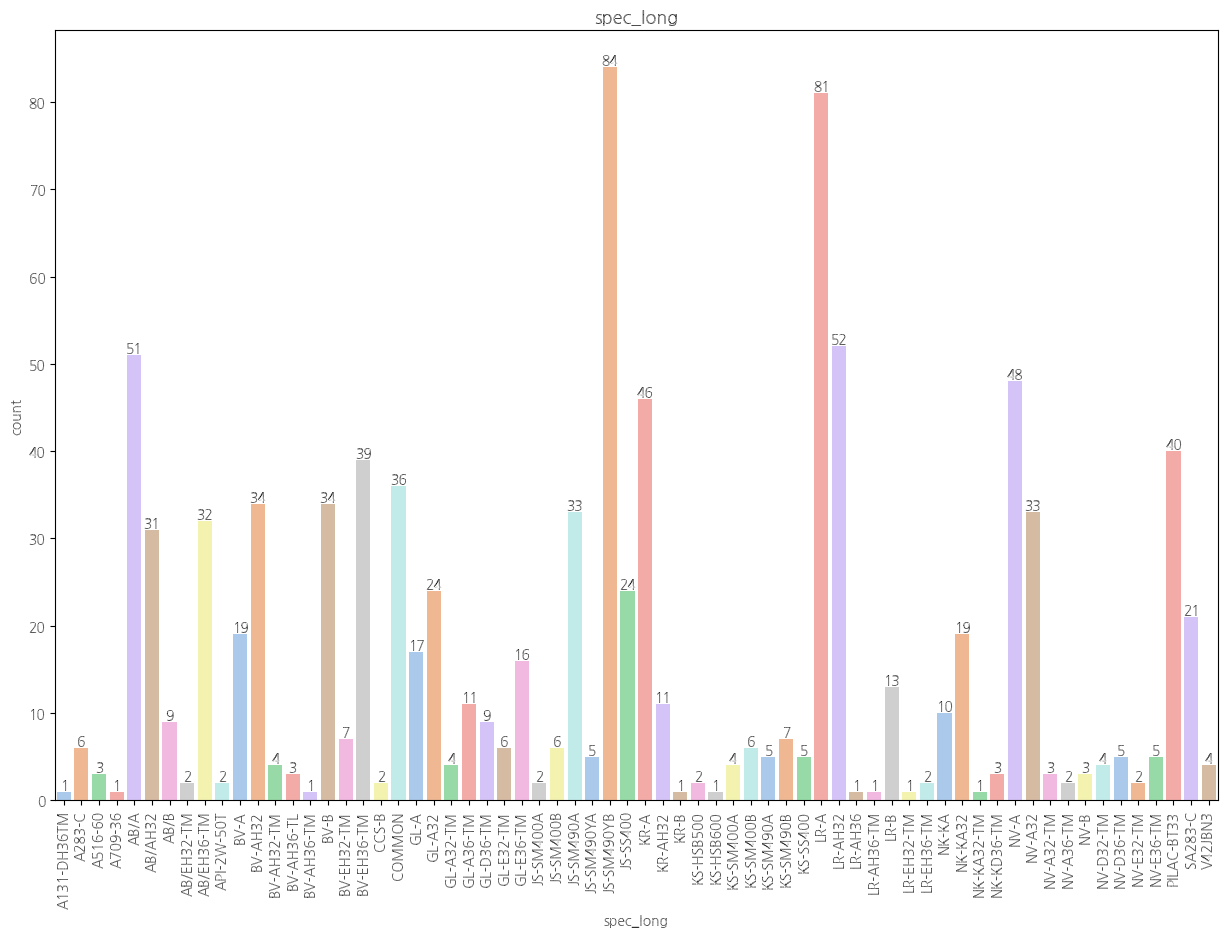

In [341]:
plc_counts = df['spec_long'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(15, 10))

colors = sns.color_palette("pastel", len(plc_counts))

p1 = sns.countplot(x='spec_long', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p1.containers[0], fmt='%d') 

ax.set_title('spec_long', fontsize=13)
plt.xticks(rotation=90)

plt.show()


공통      36
독일      87
미국     159
영국     256
일본     187
프랑스    143
한국     132
Name: spec_country, dtype: int64


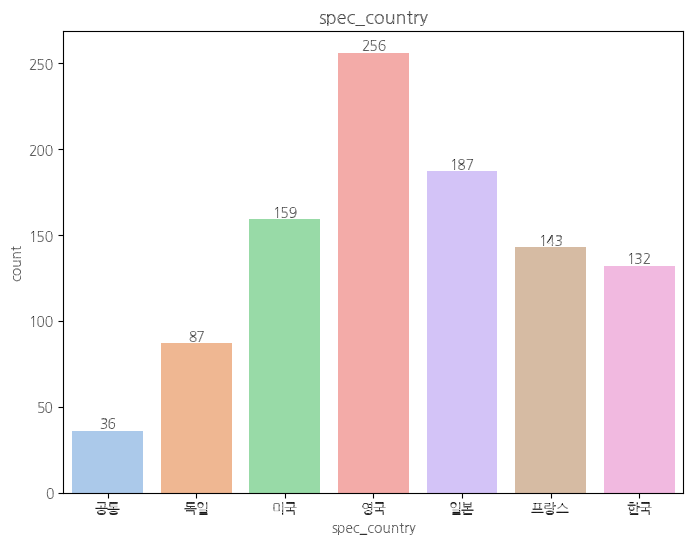

In [342]:
plc_counts = df['spec_country'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p2 = sns.countplot(x='spec_country', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p2.containers[0], fmt='%d') 

ax.set_title('spec_country', fontsize=13)

plt.show()


C    755
T    245
Name: steel_kind, dtype: int64


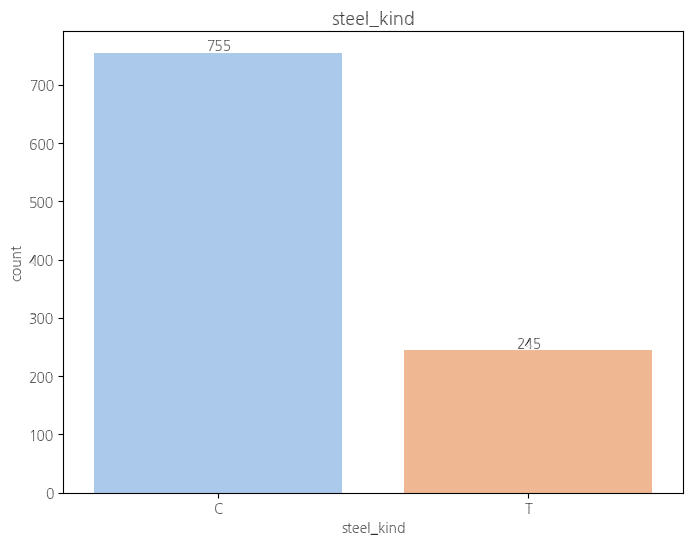

In [343]:
plc_counts = df['steel_kind'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p4 = sns.countplot(x='steel_kind', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p4.containers[0], fmt='%d') 

ax.set_title('steel_kind', fontsize=13)

plt.show()


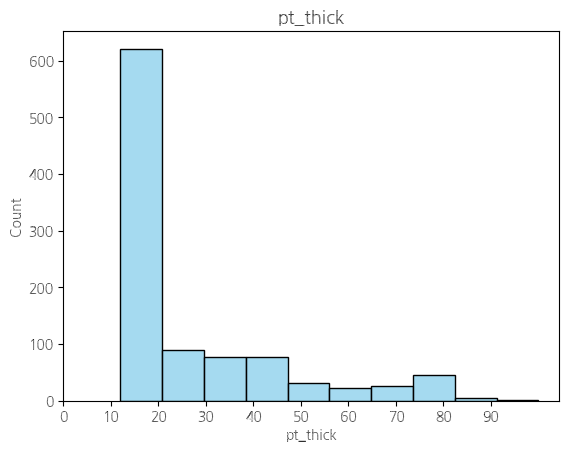

In [344]:
sns.histplot(data=df, x='pt_thick', bins=10,  color="skyblue")
plt.title('pt_thick', fontsize=13)
plt.xticks(np.arange(0, 100, 10))
plt.show()

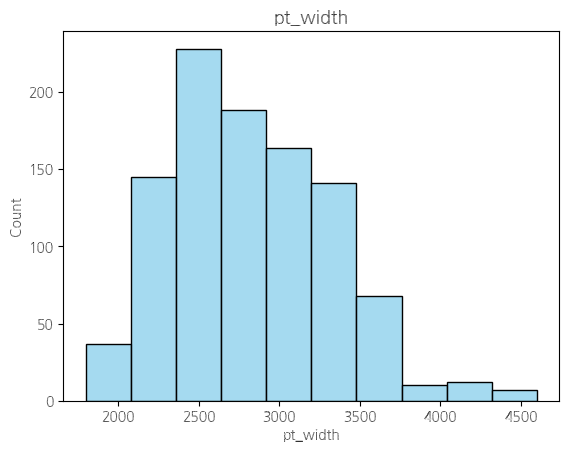

In [345]:
sns.histplot(data=df, x='pt_width', bins=10,  color="skyblue")
plt.title('pt_width', fontsize=13)
plt.show()

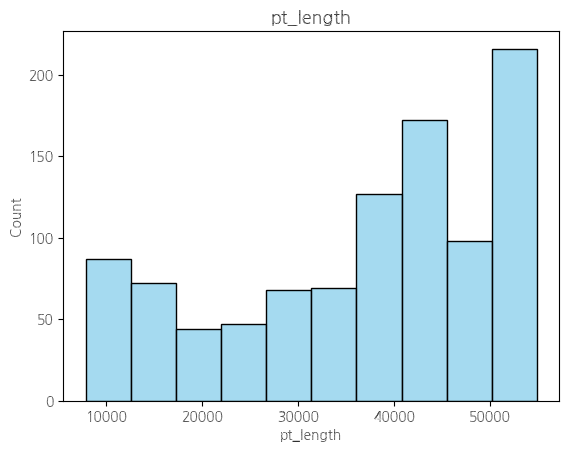

In [346]:
sns.histplot(data=df, x='pt_length', bins=10,  color="skyblue")
plt.title('pt_length', fontsize=13)
plt.show()

미적용     47
적용     953
Name: hsb, dtype: int64


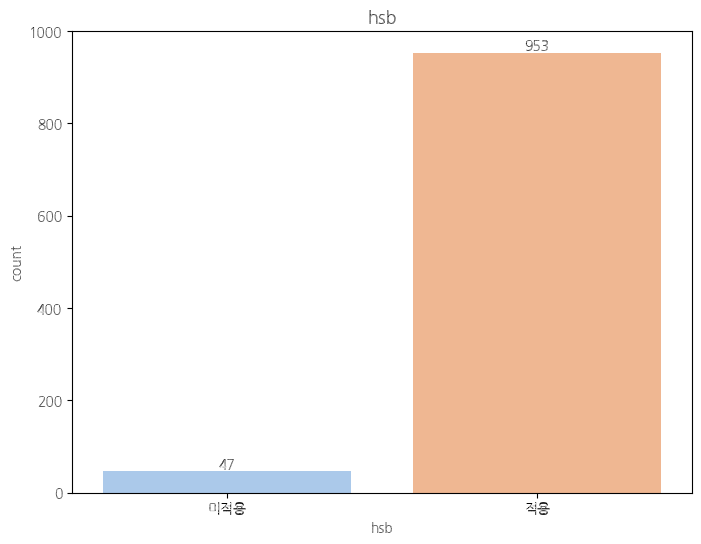

In [347]:
plc_counts = df['hsb'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p5 = sns.countplot(x='hsb', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p5.containers[0], fmt='%d') 

ax.set_title('hsb', fontsize=13)

plt.show()

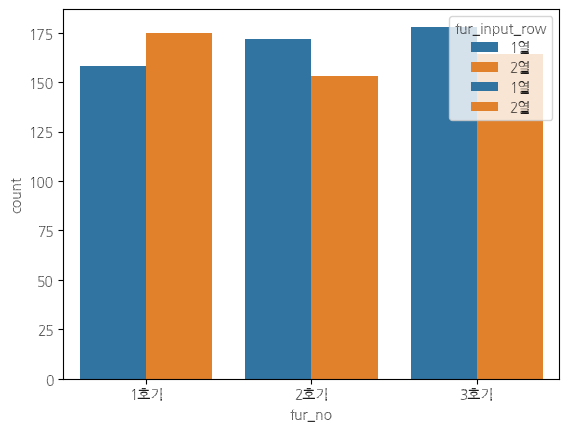

In [350]:
sns.countplot(x='fur_no', hue='fur_input_row', data=df)
plt.show()

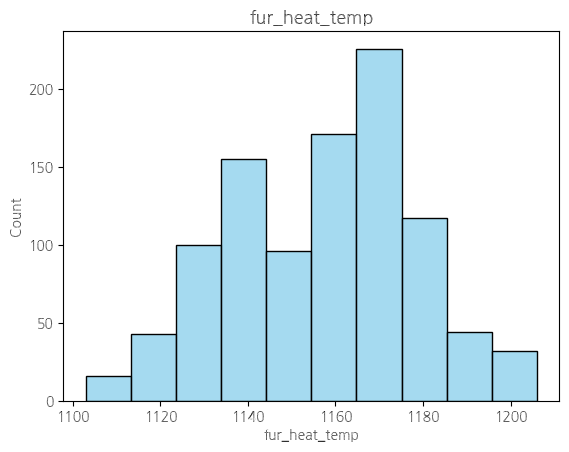

In [351]:
sns.histplot(data=df, x='fur_heat_temp', bins=10,  color="skyblue")
plt.title('fur_heat_temp', fontsize=13)
plt.show()

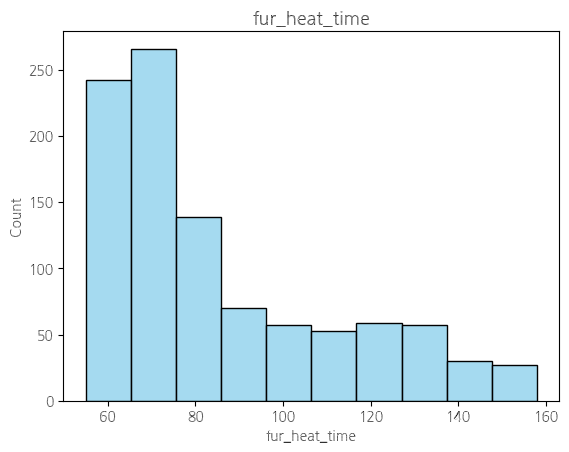

In [353]:
sns.histplot(data=df, x='fur_heat_time', bins=10,  color="skyblue")
plt.title('fur_heat_time', fontsize=13)
plt.show()

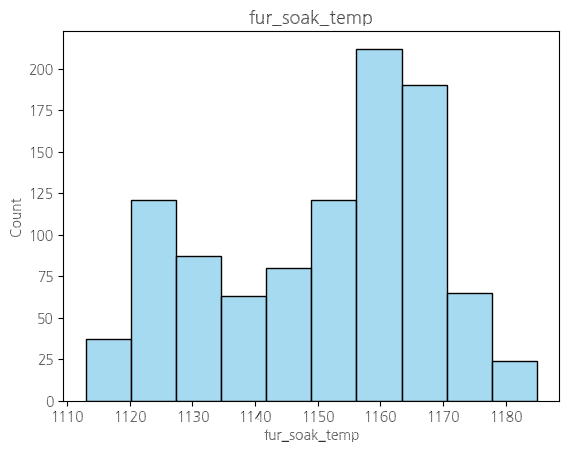

In [354]:
sns.histplot(data=df, x='fur_soak_temp', bins=10,  color="skyblue")
plt.title('fur_soak_temp', fontsize=13)
plt.show()


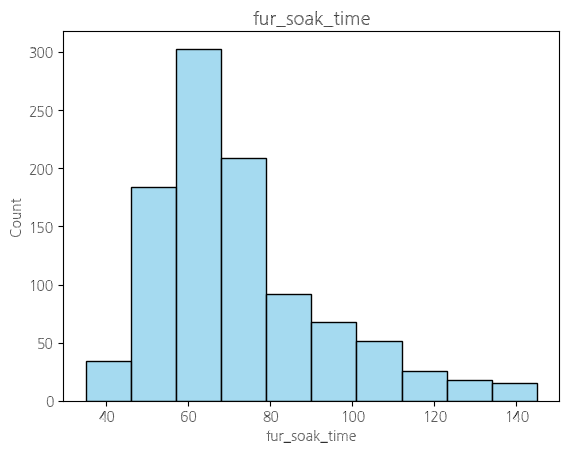

In [355]:
sns.histplot(data=df, x='fur_soak_time', bins=10,  color="skyblue")
plt.title('fur_soak_time', fontsize=13)
plt.show()

CR(제어압연)      840
TMCP(온도제어)    160
Name: rolling_method, dtype: int64


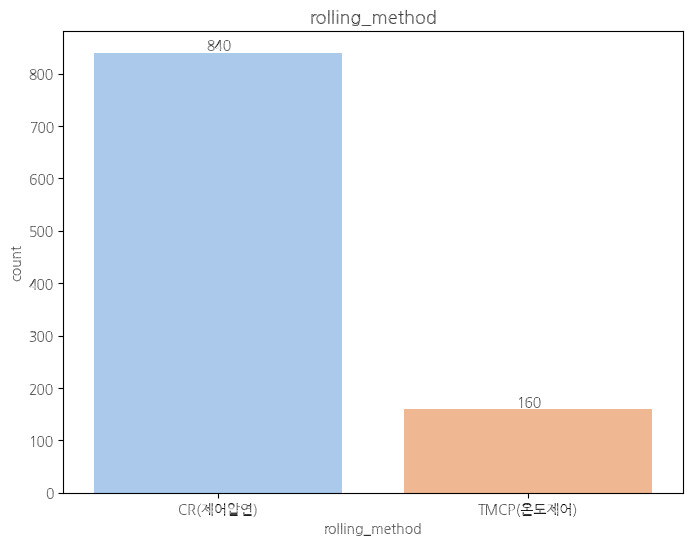

In [356]:
plc_counts = df['rolling_method'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p8 = sns.countplot(x='rolling_method', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p8.containers[0], fmt='%d') 

ax.set_title('rolling_method', fontsize=13)

plt.show()

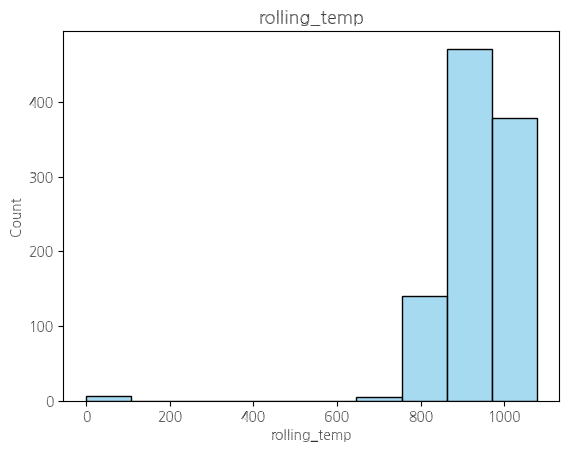

In [357]:
sns.histplot(data=df, x='rolling_temp', bins=10,  color="skyblue")
plt.title('rolling_temp', fontsize=13)
plt.show()
 

5       6
6     206
7      20
8     249
9      31
10    488
Name: descaling_count, dtype: int64


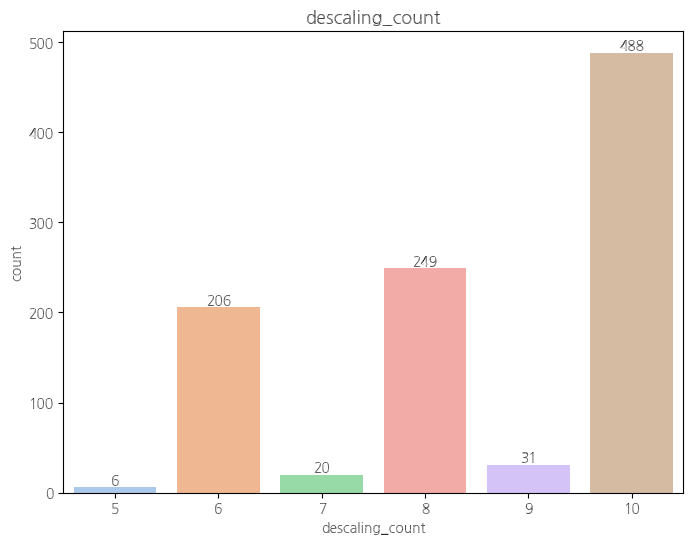

In [358]:
plc_counts = df['descaling_count'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p9 = sns.countplot(x='descaling_count', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p9.containers[0], fmt='%d') 

ax.set_title('descaling_count', fontsize=13)

plt.show()

1조    280
2조    292
3조    218
4조    210
Name: work_group, dtype: int64


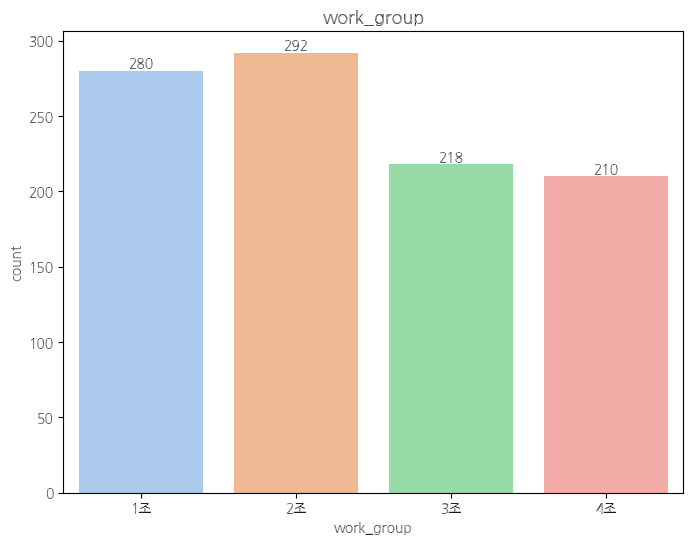

In [359]:
plc_counts = df['work_group'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p10 = sns.countplot(x='work_group', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p10.containers[0], fmt='%d') 

ax.set_title('work_group', fontsize=13)

plt.show() 

## 변수제거 
(plate_no, rolling_date, spec_long, spec_country, work_group)

In [360]:
df_raw = df_raw.drop(columns=['plate_no', 'rolling_date', 'spec_long', 'spec_country', 'work_group'])

## 목표변수 0(양품), 1(불량) 로 변환

In [361]:
# 스케일 변수를 불량이면 1, 양품이면 0으로 변환
df_raw["scale"].replace(to_replace = "양품", value = 0, inplace = True)
df_raw["scale"].replace(to_replace = "불량", value = 1, inplace = True)
df_raw.head()

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8


## 이상치 제거

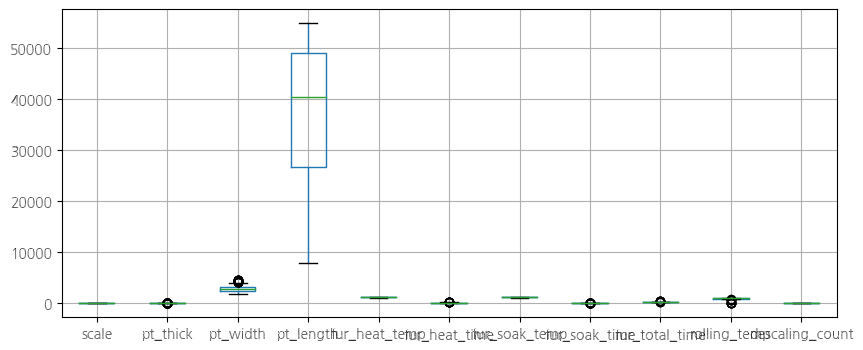

In [362]:
df_raw.boxplot(figsize=(10,4))
plt.show()

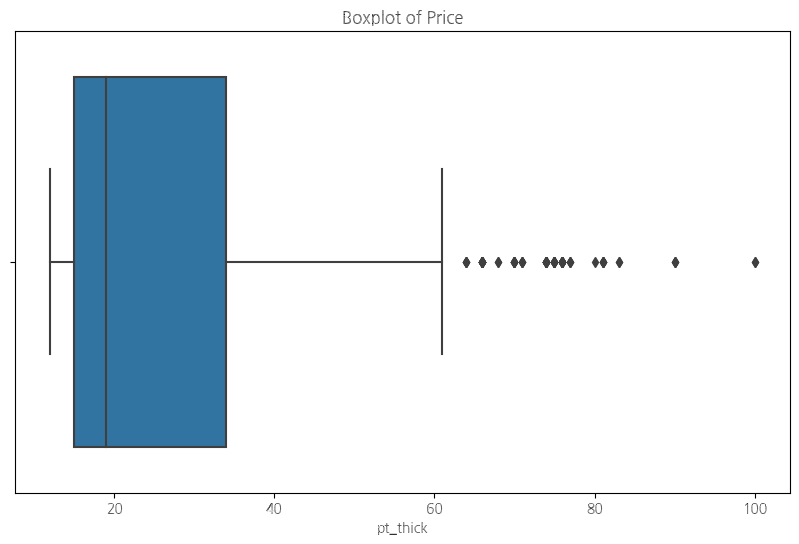

In [363]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['pt_thick'])
plt.title('Boxplot of Price')
plt.xlabel('pt_thick')
plt.show()

In [364]:
new  = df_raw[df_raw['pt_thick'] >= 100]
new

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
859,1,C,100,2300,9500,적용,3호기,2열,1144,85,1150,52,219,CR(제어압연),1050,6
860,1,C,100,2300,9500,적용,1호기,1열,1130,78,1137,61,206,CR(제어압연),1037,6


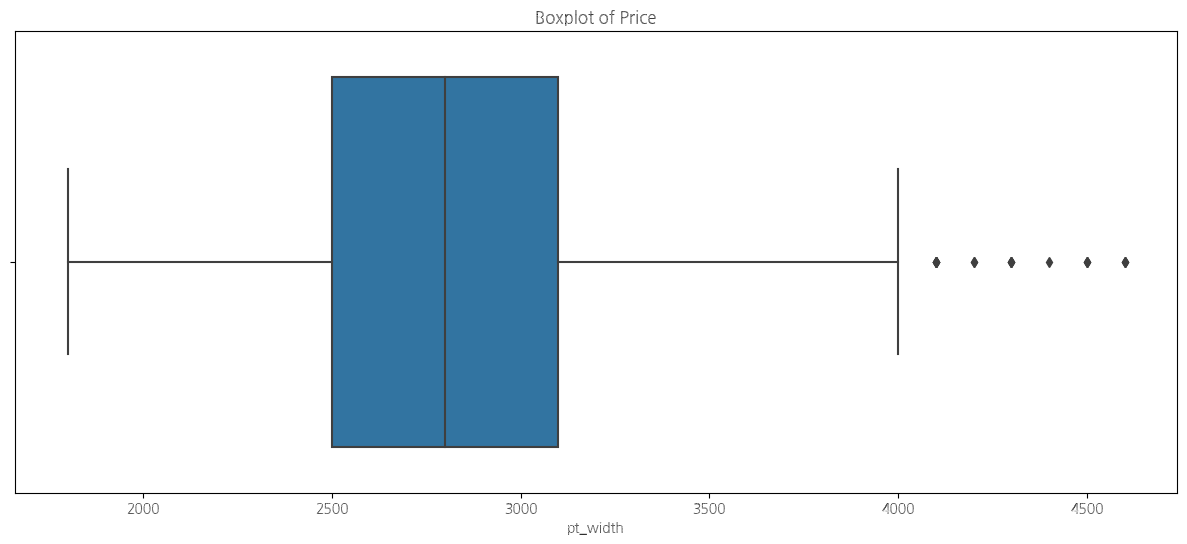

In [365]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_raw['pt_width'])
plt.title('Boxplot of Price')
plt.xlabel('pt_width')
plt.show()

In [366]:
new  = df_raw[df_raw['pt_width'] >= 4500]
new

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
416,0,C,16,4600,24100,적용,2호기,2열,1174,71,1167,58,190,CR(제어압연),933,10
419,1,C,20,4500,20700,적용,2호기,1열,1154,77,1160,50,182,CR(제어압연),961,7
420,0,C,20,4500,20700,적용,2호기,2열,1163,82,1160,53,191,CR(제어압연),959,8
422,1,C,24,4500,20900,적용,3호기,2열,1149,63,1164,65,226,CR(제어압연),976,7
425,0,C,24,4600,17300,적용,2호기,1열,1146,75,1157,52,207,CR(제어압연),957,8
426,0,C,24,4600,17300,적용,2호기,2열,1160,77,1160,64,226,CR(제어압연),956,8


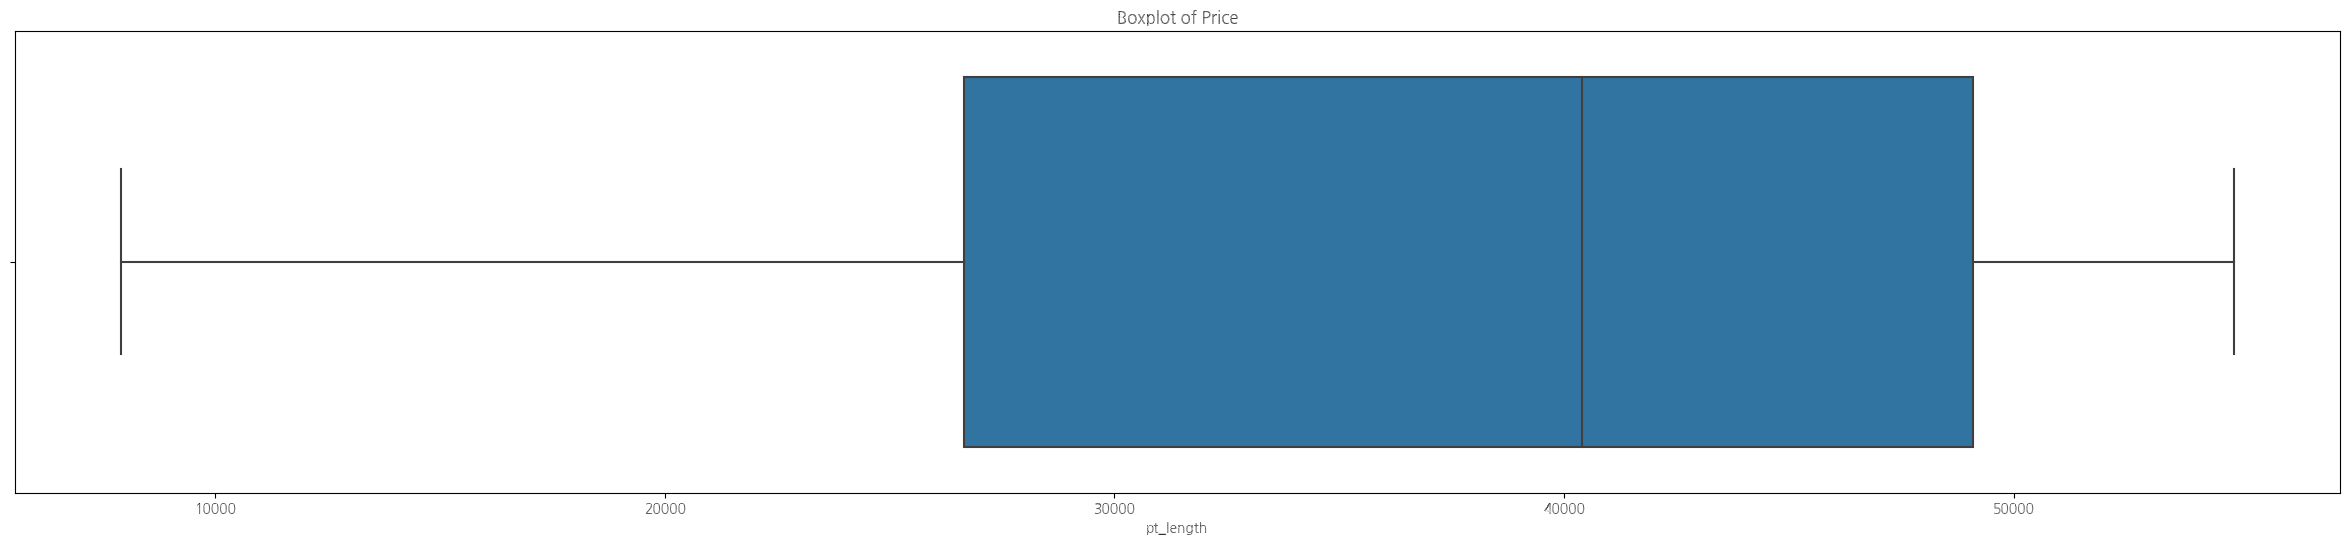

In [367]:
plt.figure(figsize=(30,6))
sns.boxplot(x=df_raw['pt_length'])
plt.title('Boxplot of Price')
plt.xlabel('pt_length')
plt.show()

pt_thick, pt_width, pt_length  모두 이상치 없음

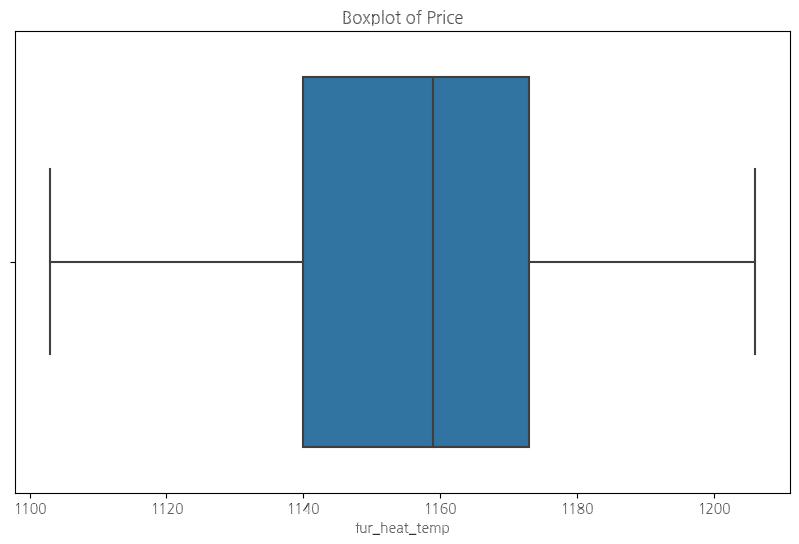

In [368]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_heat_temp'])
plt.title('Boxplot of Price')
plt.xlabel('fur_heat_temp')
plt.show()

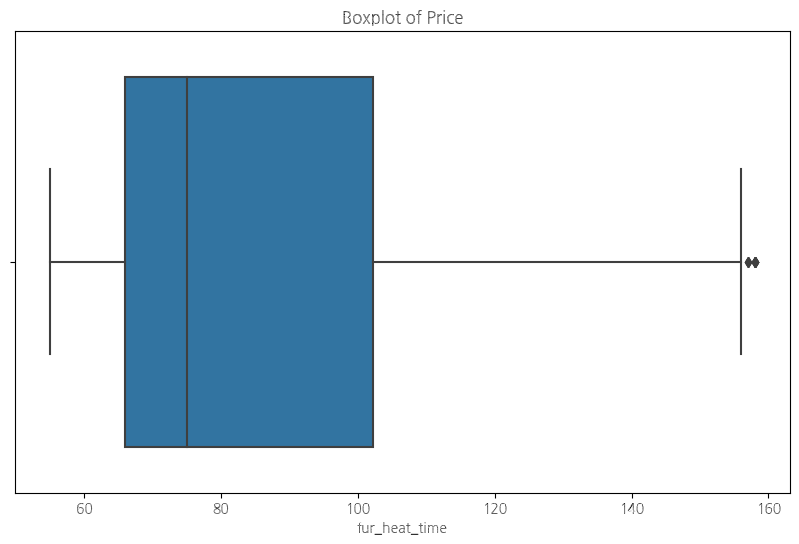

In [369]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_heat_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_heat_time')
plt.show()

In [370]:
new  = df_raw[df_raw['fur_heat_time'] >= 150]
new

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
565,0,T,50,1800,22200,적용,2호기,1열,1158,156,1122,96,351,CR(제어압연),901,6
567,0,T,50,2600,13100,적용,1호기,1열,1152,158,1134,78,315,CR(제어압연),900,6
577,0,T,60,2500,13300,적용,2호기,1열,1142,156,1120,85,304,CR(제어압연),894,6
578,0,T,61,2100,12300,적용,2호기,2열,1143,155,1122,87,301,CR(제어압연),901,6
651,0,C,13,3600,51700,적용,3호기,1열,1169,156,1134,82,303,CR(제어압연),872,10
652,0,C,13,3600,51700,적용,3호기,1열,1169,156,1134,92,307,CR(제어압연),872,10
653,0,C,13,3600,51700,적용,3호기,1열,1169,156,1134,65,284,CR(제어압연),872,10
663,0,C,13,3200,42700,적용,3호기,1열,1160,153,1138,71,317,CR(제어압연),906,10
664,0,C,13,3200,42700,적용,3호기,1열,1160,153,1138,81,322,CR(제어압연),906,10
676,0,C,13,2900,52700,적용,3호기,1열,1154,158,1144,56,308,CR(제어압연),926,10


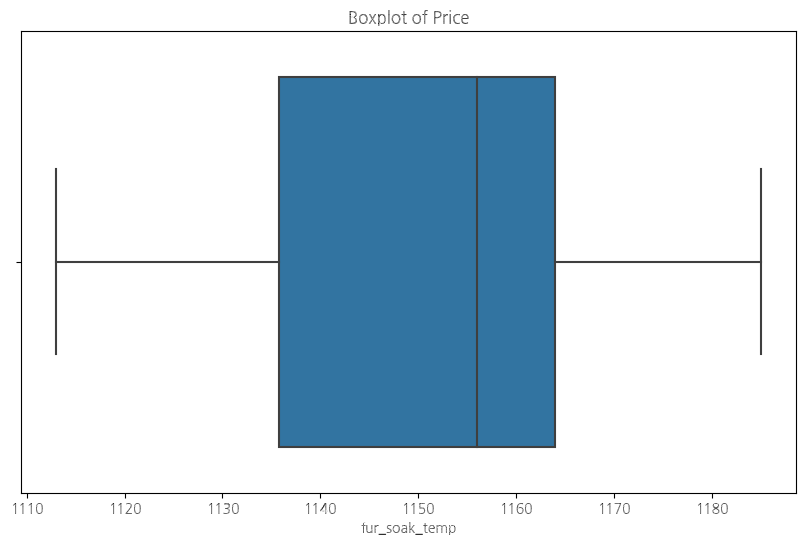

In [371]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_soak_temp'])
plt.title('Boxplot of Price')
plt.xlabel('fur_soak_temp')
plt.show()


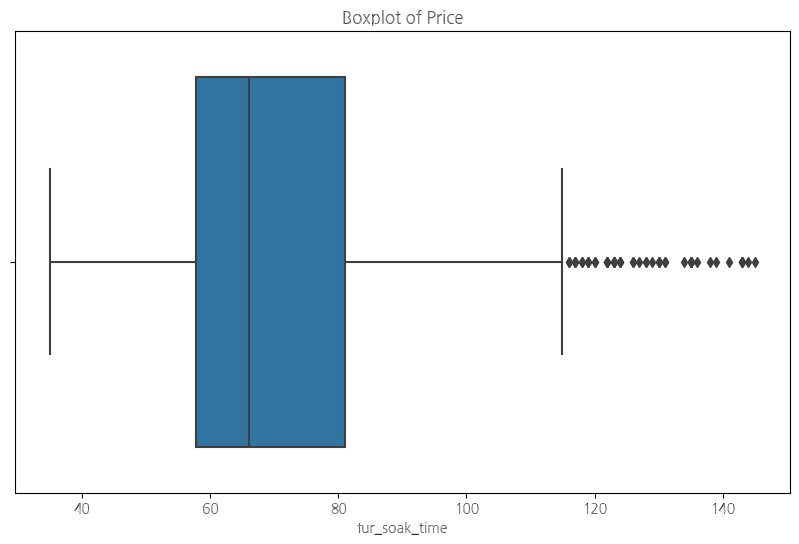

In [372]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_soak_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_soak_time')
plt.show()

In [373]:
new  = df_raw[df_raw['fur_soak_time'] >= 140]
new

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
537,0,T,40,2600,23400,적용,2호기,2열,1166,69,1118,141,289,TMCP(온도제어),818,6
612,1,T,71,3600,9200,미적용,2호기,2열,1128,92,1121,145,332,CR(제어압연),859,6
616,0,T,77,2600,7900,적용,1호기,1열,1111,77,1118,144,295,TMCP(온도제어),837,6
617,0,T,77,2600,7900,적용,1호기,2열,1113,71,1118,143,316,TMCP(온도제어),842,6
618,0,T,77,2600,7900,적용,2호기,1열,1103,68,1122,143,300,TMCP(온도제어),848,6
620,0,T,76,1800,16700,적용,3호기,1열,1124,77,1127,143,326,CR(제어압연),811,6


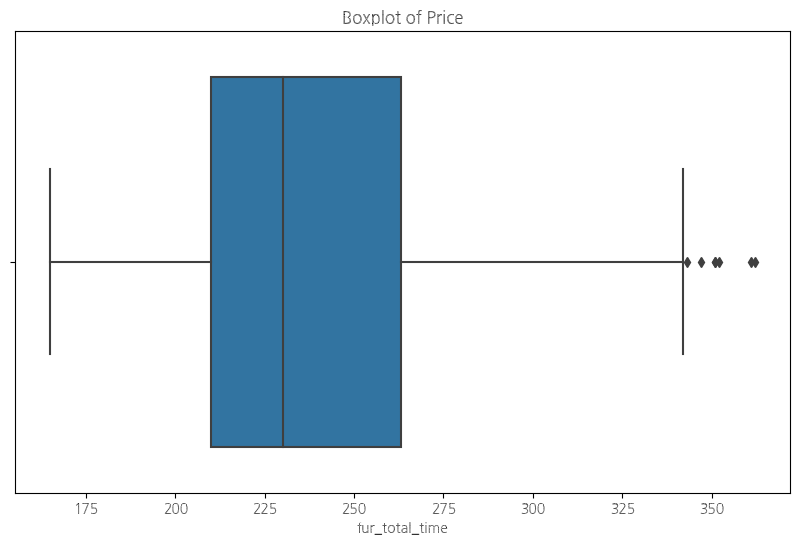

In [374]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_total_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_total_time')
plt.show()


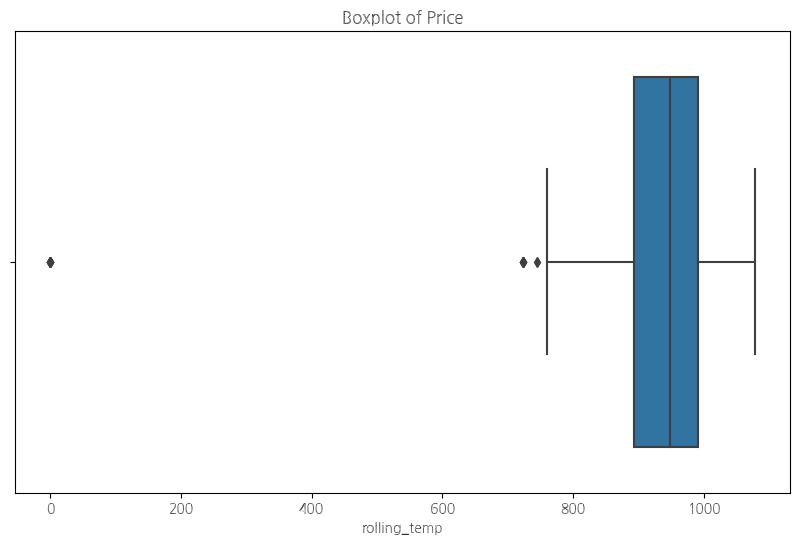

In [375]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['rolling_temp'])
plt.title('Boxplot of Price')
plt.xlabel('rolling_temp')
plt.show()


In [376]:
new  = df_raw[df_raw['rolling_temp'] == 0]
new

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
53,0,T,56,3800,11400,적용,3호기,2열,1132,95,1128,80,244,TMCP(온도제어),0,6
221,0,C,16,2200,43600,적용,3호기,2열,1163,57,1166,67,228,CR(제어압연),0,10
222,0,C,16,2200,43600,적용,3호기,1열,1169,64,1164,61,188,CR(제어압연),0,10
598,0,T,81,2100,12900,적용,2호기,1열,1133,89,1122,59,229,CR(제어압연),0,6
599,0,T,81,2100,13200,적용,1호기,2열,1130,92,1124,61,210,CR(제어압연),0,6
600,0,T,40,2500,23600,적용,3호기,1열,1119,109,1117,76,260,TMCP(온도제어),0,6


In [377]:
# df_raw에서 descaling_count가 0인 행을 삭제하고 원본 데이터프레임을 업데이트
df_raw = df_raw[df_raw['rolling_temp'] != 0]

# 삭제 후 데이터프레임의 정보 확인
df_raw_info = df_raw.info()

df_raw_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            994 non-null    int64 
 1   steel_kind       994 non-null    object
 2   pt_thick         994 non-null    int64 
 3   pt_width         994 non-null    int64 
 4   pt_length        994 non-null    int64 
 5   hsb              994 non-null    object
 6   fur_no           994 non-null    object
 7   fur_input_row    994 non-null    object
 8   fur_heat_temp    994 non-null    int64 
 9   fur_heat_time    994 non-null    int64 
 10  fur_soak_temp    994 non-null    int64 
 11  fur_soak_time    994 non-null    int64 
 12  fur_total_time   994 non-null    int64 
 13  rolling_method   994 non-null    object
 14  rolling_temp     994 non-null    int64 
 15  descaling_count  994 non-null    int64 
dtypes: int64(11), object(5)
memory usage: 132.0+ KB


rolling_temp 가 0인 값을 이상치로 판단하고 모두 삭제

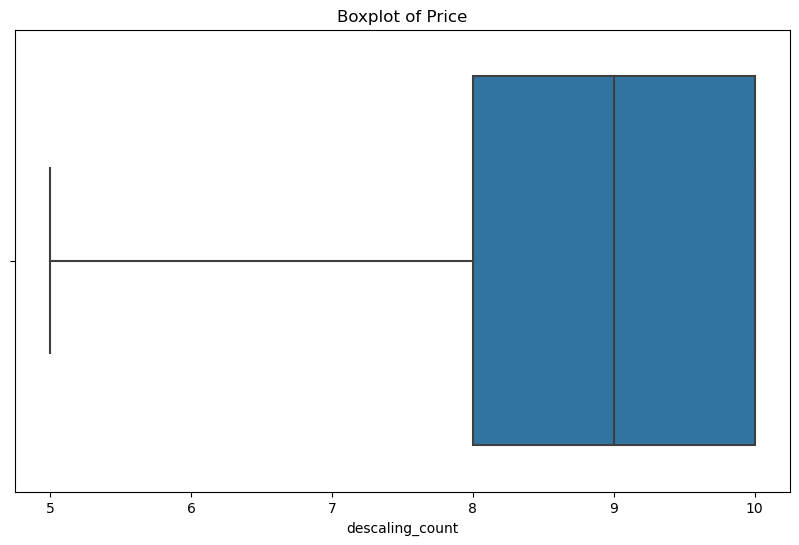

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['descaling_count'])
plt.title('Boxplot of Price')
plt.xlabel('descaling_count')
plt.show()

In [378]:
df_raw["hsb"].value_counts()

적용     947
미적용     47
Name: hsb, dtype: int64

In [379]:
df_raw["steel_kind"].value_counts()

C    753
T    241
Name: steel_kind, dtype: int64

In [380]:
df_raw["rolling_method"].value_counts()

CR(제어압연)      836
TMCP(온도제어)    158
Name: rolling_method, dtype: int64

In [381]:
df_raw["fur_no"].value_counts()

3호기    338
1호기    332
2호기    324
Name: fur_no, dtype: int64

In [382]:
df_raw["fur_input_row"].value_counts()

1열    505
2열    489
Name: fur_input_row, dtype: int64

범주형 변수에서는 이상치 없음

## fur_preheat_time 파생변수 생성
fur_total_time - ( fur_heat_time + fur_soak_time ) = fur_preheat_time

In [383]:
# fur_preheat_time 컬럼 생성
df_raw['fur_preheat_time'] = df_raw['fur_total_time'] - df_raw['fur_soak_time'] - df_raw['fur_heat_time']

# fur_total_time 컬럼 제거
df_raw = df_raw.drop(columns=['fur_total_time'])
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,rolling_method,rolling_temp,descaling_count,fur_preheat_time
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,TMCP(온도제어),934,8,84
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,TMCP(온도제어),937,8,63
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,TMCP(온도제어),889,8,87
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,TMCP(온도제어),885,8,73
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,TMCP(온도제어),873,8,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,CR(제어압연),948,10,62
996,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,CR(제어압연),948,10,68
997,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,CR(제어압연),948,10,85
998,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,CR(제어압연),948,10,62


## furnace 파생변수 생성
fur_no + fur_input_row = furnace

In [384]:
# fur_no 컬럼에서 숫자만 추출하여 새로운 컬럼에 저장
df_raw['furnace'] = df_raw['fur_no'] + df_raw['fur_input_row']
df_raw = df_raw.drop(columns=['fur_no', 'fur_input_row'])
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,rolling_method,rolling_temp,descaling_count,fur_preheat_time,furnace
0,0,T,32,3700,15100,적용,1144,116,1133,59,TMCP(온도제어),934,8,84,1호기1열
1,0,T,32,3700,15100,적용,1144,122,1135,53,TMCP(온도제어),937,8,63,1호기2열
2,0,T,33,3600,19200,적용,1129,116,1121,55,TMCP(온도제어),889,8,87,2호기1열
3,0,T,33,3600,19200,적용,1152,125,1127,68,TMCP(온도제어),885,8,73,2호기2열
4,0,T,38,3100,13300,적용,1140,134,1128,48,TMCP(온도제어),873,8,64,3호기1열
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1142,55,1151,86,CR(제어압연),948,10,62,1호기2열
996,0,C,19,3400,41500,적용,1142,55,1151,86,CR(제어압연),948,10,68,1호기2열
997,0,C,17,3400,43700,적용,1169,65,1163,77,CR(제어압연),948,10,85,2호기2열
998,0,C,17,3400,43700,적용,1169,65,1163,77,CR(제어압연),948,10,62,2호기2열


In [385]:
df_raw.to_csv("preprocessed_scale.csv", index=False)

# 2. 가설세우기

1. 강종의 성분에 따라 Scale 형성 속도와 두께에 영향을 미친다.

2. Plate의 지시 두께, 폭, 길이가 클 때 발생한 온도 불균일이 Scale의 불균일한 분포에 영향을 미친다.

3. HSB 미적용 시 표면에 남은 Scale로 인해 Scale 불량 발생률이 증가한다. 

4. 가열로 호기의 설비 불량과 장입열에 온도 불균일이 Scale 불량 발생률 증가에 영향을 미친다.

5. 가열로 가열대에서의 소재온도와 재로시간에 따른 철강의 내외부 온도차이로 Scale 불량 발생률에 영향을 미친다.

6. 가열로 균열대에서의 소재온도와 재로시간에 따른 철강의 최종 온도가 Scale 불량 발생률에 영향을 미친다.

7. 가열로 예열대에서의 느린 소재 가열 온도에 의해 Scale 두께 증가에 영향을 미친다.

8. 압연 방법에 따른 공정 중 철강의 온도 관리 차이로 인해 Scale 불량 발생률에 영향을 미친다.

9. 압연 시작 전 온도인 압연 온도가 고온일 경우 Scale 불량 발생률을 증가시킨다.


# 3. EDA

# 3-1 그래프

In [386]:
# 상관관계 확인
df_raw.corr()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,rolling_temp,descaling_count,fur_preheat_time
scale,1.000000,-0.094441,-0.193817,0.048928,0.220581,-0.036178,0.326957,-0.220873,0.511333,-0.043415,0.037959
pt_thick,-0.094441,1.000000,-0.320606,-0.866691,-0.522101,0.205822,-0.663015,0.363622,-0.450942,-0.845154,0.013969
pt_width,-0.193817,-0.320606,1.000000,0.148769,0.201312,-0.103698,0.218066,-0.101242,-0.155038,0.353954,-0.029664
pt_length,0.048928,-0.866691,0.148769,1.000000,0.466737,-0.135821,0.599513,-0.336363,0.366254,0.816850,-0.008013
fur_heat_temp,0.220581,-0.522101,0.201312,0.466737,1.000000,-0.161504,0.785440,-0.375056,0.341403,0.483688,-0.001877
fur_heat_time,-0.036178,0.205822,-0.103698,-0.135821,-0.161504,1.000000,-0.347486,0.114218,-0.131929,-0.163866,-0.038393
fur_soak_temp,0.326957,-0.663015,0.218066,0.599513,0.785440,-0.347486,1.000000,-0.601144,0.628510,0.623454,0.000287
fur_soak_time,-0.220873,0.363622,-0.101242,-0.336363,-0.375056,0.114218,-0.601144,1.000000,-0.486545,-0.402145,0.036190
rolling_temp,0.511333,-0.450942,-0.155038,0.366254,0.341403,-0.131929,0.628510,-0.486545,1.000000,0.313695,0.021403
descaling_count,-0.043415,-0.845154,0.353954,0.816850,0.483688,-0.163866,0.623454,-0.402145,0.313695,1.000000,-0.027280


In [387]:
sns.pairplot(df_raw)